In [1]:
import elettra_toolbox
import matplotlib.pyplot as plt
import seaborn as sns
from config import parameters, settings
from cpymad.madx import Madx
from matplotlib import cm, gridspec, patches
from pyhdtoolkit.cpymadtools.plotters import LatticePlotter
from pyhdtoolkit.utils import defaults

defaults.config_logger()
plt.rcParams.update({"text.usetex": False}) # Until LateX is back 
%matplotlib inline
%config InlineBackend.figure_format = "retina"
sns.set_palette("pastel")

In [2]:
# Launch MAD-X Session
with open("stdout.out", "w") as f:
    madx = Madx(stdout=f)

In [3]:
# Read parameters
for i in parameters.keys():
    madx.globals[i] = parameters[i]

In [4]:
# Call sequence and optics
madx.call("elettra2_v15_VADER_2.3T.madx")
madx.call("optics_elettra2_v15_VADER_2.3T.madx");

In [5]:
# Initial twiss
madx.use(sequence="ring")
madx.twiss(sequence="ring", table="init_twiss")
init_twiss = madx.table.init_twiss.dframe().copy()

if settings["SAVE_TWISS"]:
    init_twiss.to_parquet("init_twiss.parquet")

In [6]:
if settings["SAVE_FIGS"]:
    fig_machine_save = 'full_machine'

fig_machine = LatticePlotter.plot_latwiss(madx, "Elettra Ring", figsize=(22, 12), k0l_lim=(-7e-2, 7e-2), k1l_lim=(-1.5, 1.5), plot_dipole_k1=True, lw=1)

2021-10-04 09:46:55 | INFO     | pyhdtoolkit.cpymadtools.plotters:638 - Plotting optics functions and machine layout


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1584x864 with 4 Axes>

In [7]:
x0 = init_twiss.s[init_twiss.name == "ss:1"][0]
x1 = init_twiss.s[init_twiss.name == "ss:2"][0]

2021-10-04 09:17:14 | INFO     | pyhdtoolkit.cpymadtools.plotters:638 - Plotting optics functions and machine layout


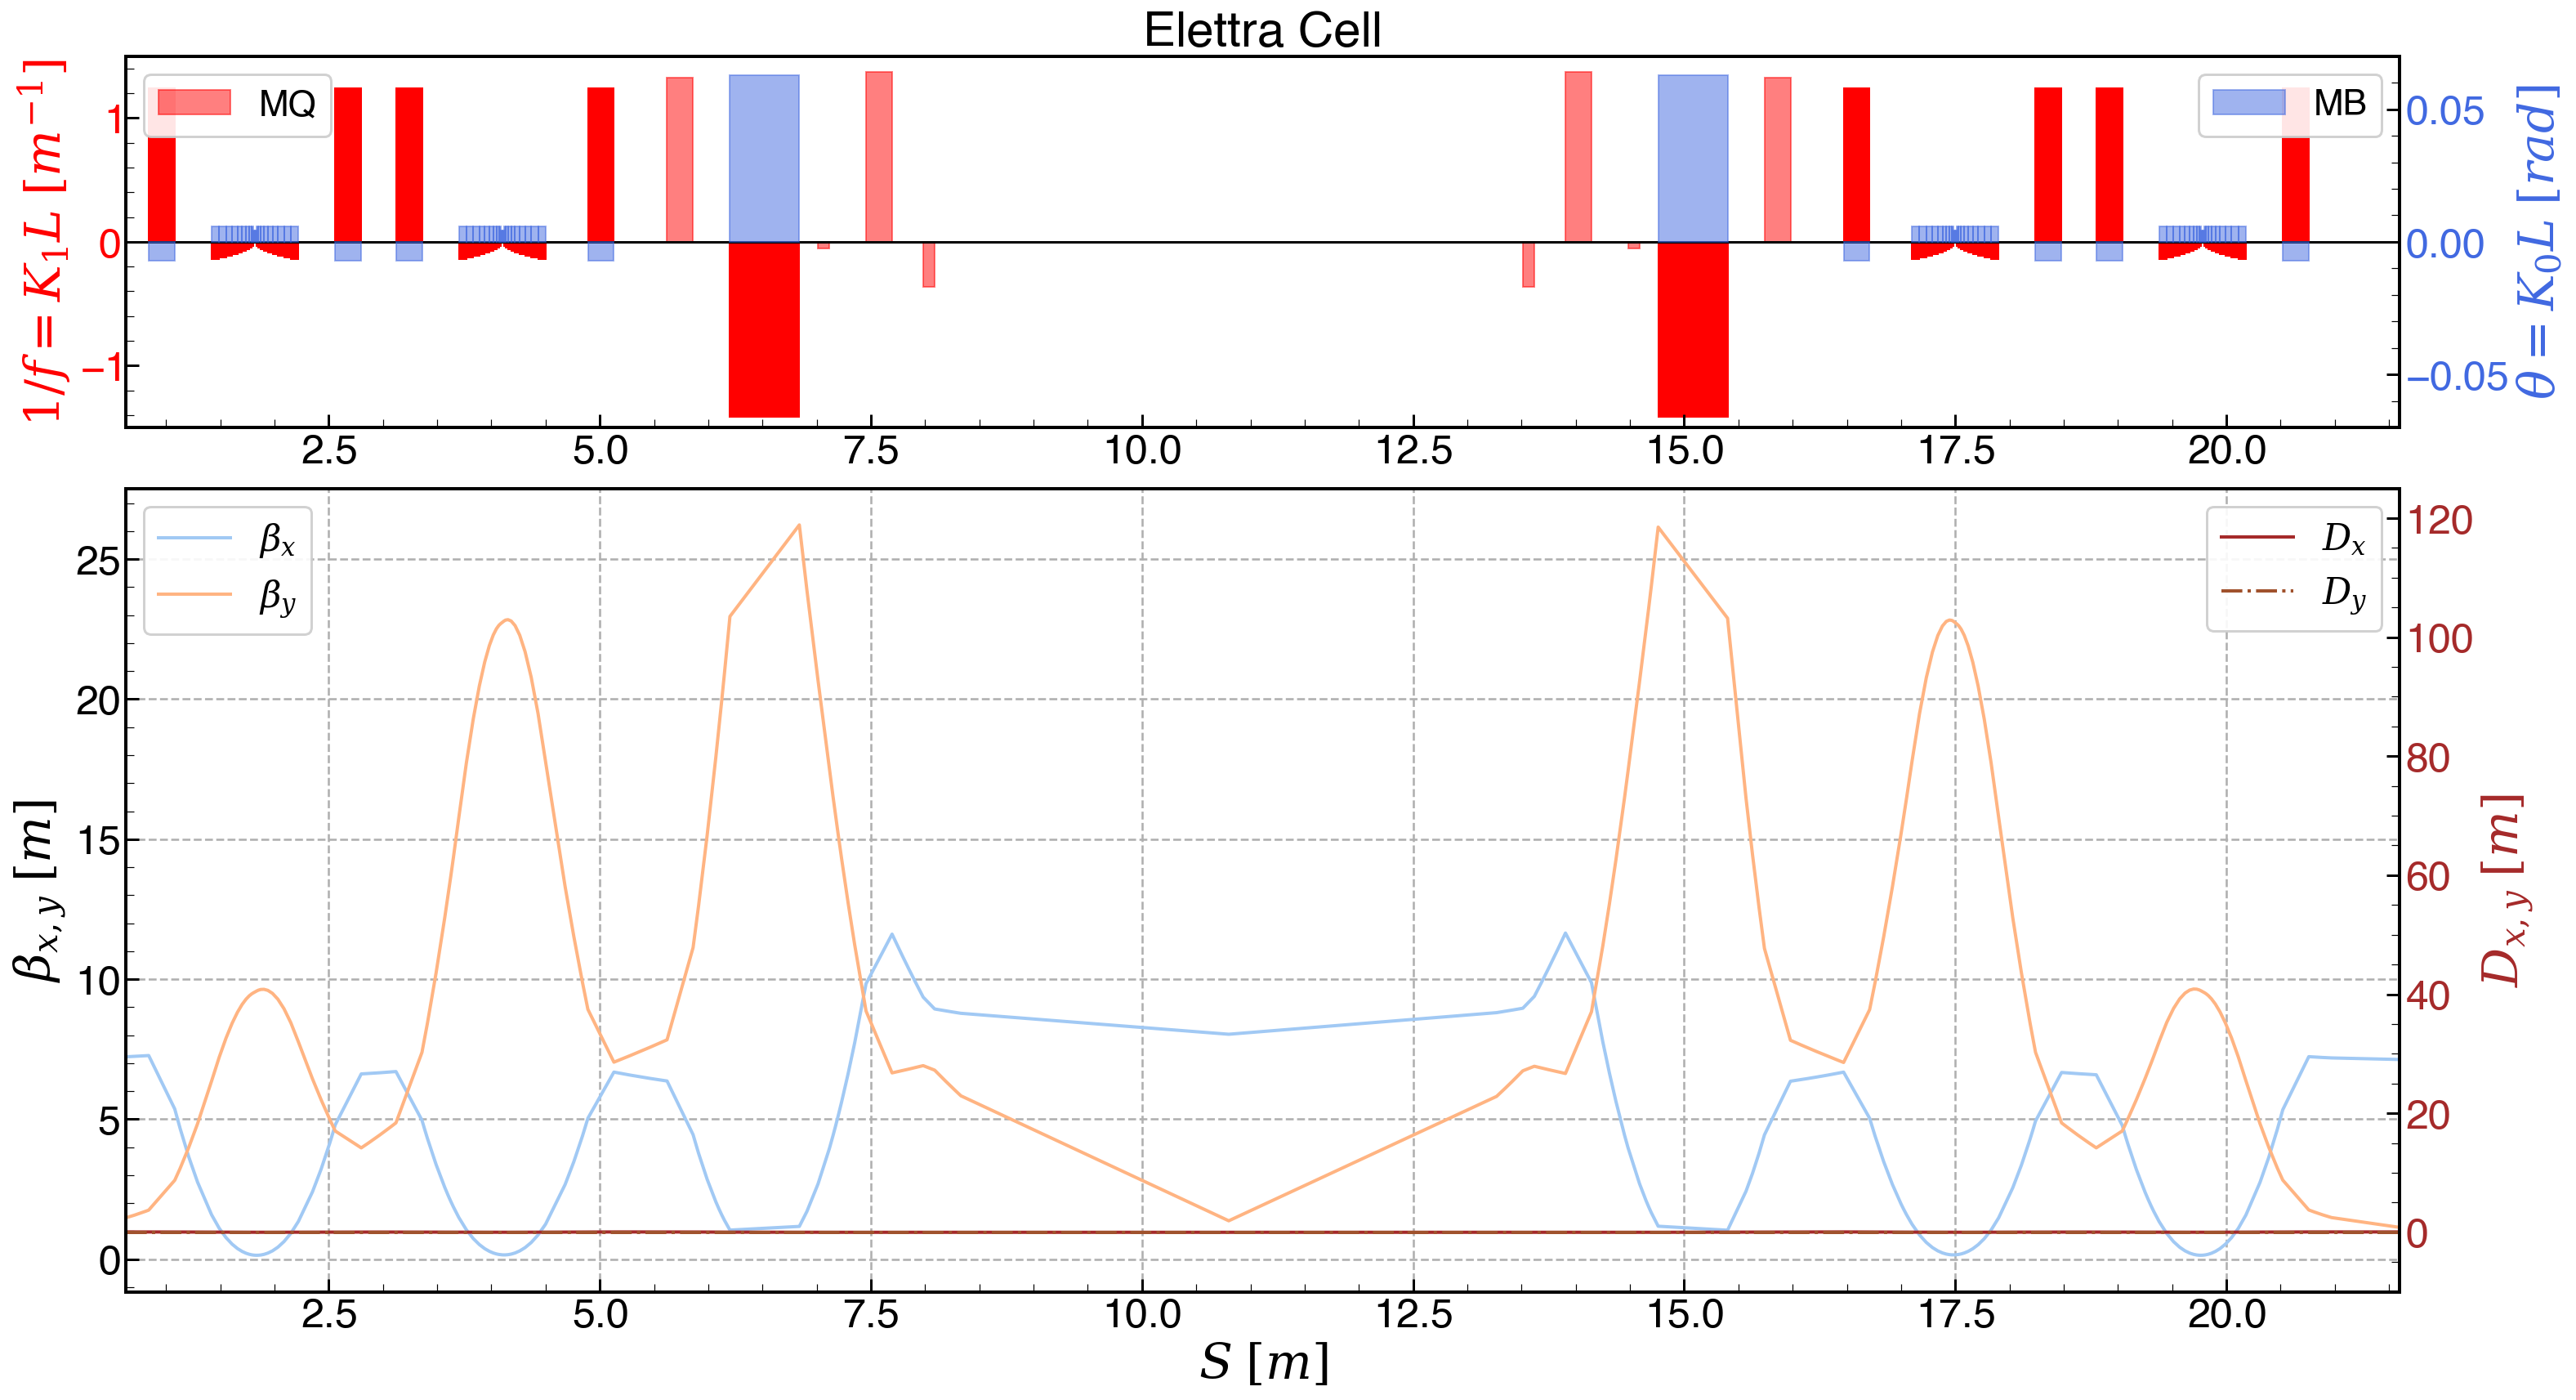

In [8]:
fig_cell = LatticePlotter.plot_latwiss(madx, "Elettra Cell", figsize=(22, 12), xlimits=(x0, x1), k0l_lim=(-7e-2, 7e-2), k1l_lim=(-1.5, 1.5), plot_dipole_k1=True, lw=1)

In [10]:
# Compute Emittance
madx.command.emit(deltap=madx.globals.deltap)

True

In [12]:
madx.quit()

In [13]:
# Get the emittance from the standard output
ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)

print(f"ex = {ex*1e12} pm")
print(f"ey = {ey*1e12} pm")
print(f"ez = {ex*1e6} um")

ex = 164.73136 pm
ey = 8.0930107e-27 pm
ez = 0.00016473136 um


---